In [3]:
import math
import time

import numpy as np


from functools import reduce
import operator

import gym


from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [4]:
def render_frames_as_gif(frames, filename):
    imageio.mimsave(filename, frames, duration = 1/35.)

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

In [5]:
initial_state = 12
goal = 28
nb_points = 49
gamma = 0.8
points_list = [(1, 0), (1, 2), (2, 3), (3, 4), (4, 5), (3, 6), (7, 3), (9, 5), (5, 8), (13, 0), 
               (14, 13), (15, 14), (16, 13),(17, 14), (18, 15), (19, 15), (19, 20), (19, 18), 
               (18, 20), (22, 20), (0, 23), (23, 14), (23, 16), (21, 20), (24, 21), (24, 17), 
               (28, 27), (27, 29), (27, 26), (26, 25), (25, 21), (21, 30), (30, 34), (31, 35), 
               (32, 36), (38, 33), (33, 37), (33, 32), (32, 31), (31, 30), (33, 39), (9, 40), 
               (39, 40), (41, 2), (39, 42), (42, 43), (43, 10), (34, 46), (35, 45), (37, 40), 
               (41, 46), (44, 45), (44, 40), (7, 41), (5, 10), (47, 12), (11, 47), (10, 47), 
               (43, 47), (46, 48), (45, 48), (48, 7)] 

In [6]:
R = -1 * np.matrix(np.ones(shape=(nb_points, nb_points)))

for point in points_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]]= 0

R[goal,goal]= 100

R

matrix([[-1.,  0., -1., ..., -1., -1., -1.],
        [ 0., -1.,  0., ..., -1., -1., -1.],
        [-1.,  0., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1.,  0.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ...,  0., -1., -1.]])

In [8]:
def available_actions(state):
    current_state_row = R[state]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = np.random.choice(available_act, 1)[0]
    return next_action

def update(current_state, action, gamma):
    max_value = np.max(Q[action, :])
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

Trained Q matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Execution time : 0.108


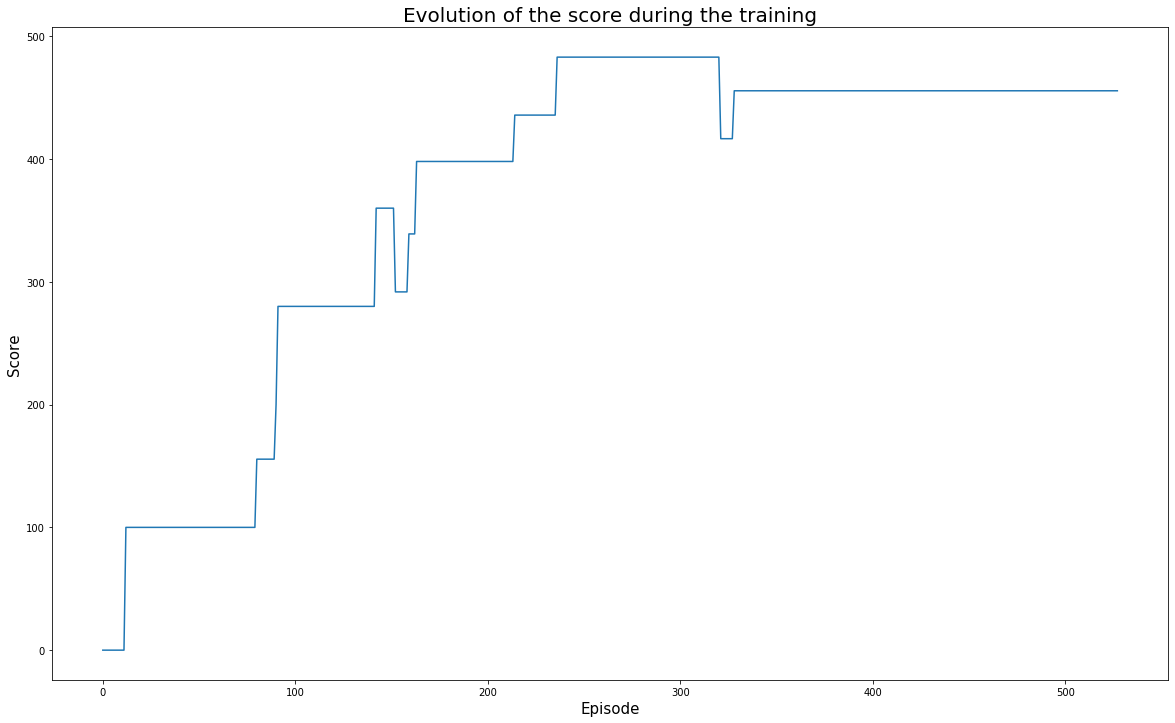

In [11]:
Q = np.matrix(np.zeros([nb_points, nb_points]))

start = time.time()

scores = []
while True:
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    
    if len(scores) > 200:
        if max(scores[-200:]) - min(scores[-200:]) < 5:
            break
    
end = time.time()
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)
print("Execution time : {:.3f}".format(end-start))

plt.figure(figsize=(20,12))
plt.plot(scores)
plt.title("Evolution of the score during the training", fontsize=20)
plt.ylabel("Score", fontsize=15)
plt.xlabel("Episode", fontsize=15)
plt.show()

In [13]:
current_state = initial_state
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[12, 12, 46, 17, 24, 1, 15, 28]
